In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from os import listdir
from os.path import join 
matplotlib.rcParams.update({'font.size': 18})
from sklearn.decomposition import NMF
# import cv2
# import os
# os.sys.path.append('/home/milind/anaconda3/envs/fhofer/lib/python3.5/')

# os.sys.path
# !pip install opencv-python

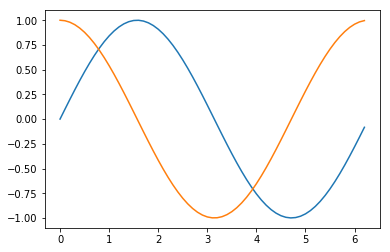

In [13]:
x = np.arange(0,2*np.pi,0.1)
sin = np.sin(x)
cos = np.cos(x)
a = [sin, cos]
for i in a:
    plt.plot(x,i)

In [2]:
import cv2
import os

In [3]:
# Frobenius norm with square root
def lstcost(A,B):
    return np.sqrt(np.sum((A-B)**2))
  
# second type of divergence  
def divcost(A,B):
    return np.sum(A*np.log(A/B))-np.sum(A)+np.sum(B)

  
def lstfind(V,r,numiter,toprint):
    n= V.shape[0]
    m= V.shape[1]
    # initial scaling copied from scikit 
    # implementation
    q= (V.mean())/r
    W= q*np.random.random((n,r))
    H= q*np.random.random((r,m))
    cost=[lstcost(V,np.dot(W,H))]
    for i in range(1,numiter+1):
        W = W*(np.dot(V,H.T))/(np.dot(W,np.dot(H,H.T)))
    # TODO: remove the hnew?
        hnew= H*(np.dot(W.T,V))/(np.dot(W.T,np.dot(W,H)))
    # W is updated before H is and the new value is used    
        H= hnew.copy()
        
        if i%toprint==0:
            cost.append(lstcost(V,np.dot(W,H)))
            print("cost after " +str(i) + " iterations: " + str(cost[-1]) )
    return (W,H,cost)
  
def divfind(V,r,numiter,toprint):
    n= V.shape[0]
    m= V.shape[1]
    q= (V.mean())/r
    q=1
    W= q*np.random.random((n,r))
    H= q*np.random.random((r,m))
    cost=[divcost(V,np.dot(W,H))]
    for i in range(1,numiter+1):
        W = W*(np.dot(V/np.dot(W,H),H.T))/(np.sum(H,axis=1,keepdims=True)).T
        H = H*(np.dot(W.T,V/np.dot(W,H)))/(np.sum(W,axis=0,keepdims=True)).T
        #wnew= W*(np.dot(V,H.T))/(np.dot(W,np.dot(H,H.T)))
        #H= hnew.copy()
        #W= wnew.copy()
        if i%toprint==0:
            cost.append(divcost(V,np.dot(W,H)))
            print("cost after " +str(i) + " iterations: " + str(cost[-1]) )
    return (W,H,cost)
  
def plotfigure(figsize,xlabel,ylabel,title,x,y=[],style="k-",graph="plot"):
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if y==[]:
        plt.plot(x,style)
    else:
        if graph=="plot":
            plt.plot(x,y,style)
        if graph== "semilogx":
            plt.semilogx(x,y,style)
        if graph== "semilogy":
            plt.semilogy(x,y,style)
        if graph== "loglog":
            plt.loglog(x,y,style)
    plt.tight_layout()
    plt.show()
    plt.close()

In [6]:
# randomly generate non negative data
n= 10
m= 100000
V= 2*np.random.random((n,m))


In [7]:
numiter=200
# number of basis vectors to be found
r=5
toprint=10

cost after 10 iterations: 454.0956456763651
cost after 20 iterations: 425.3998305401594
cost after 30 iterations: 418.4998271958768
cost after 40 iterations: 416.00195433043433
cost after 50 iterations: 414.5554461935937
cost after 60 iterations: 413.5332279234806
cost after 70 iterations: 412.7585950042395
cost after 80 iterations: 412.1523287025122
cost after 90 iterations: 411.6686914454329
cost after 100 iterations: 411.27719866839544
cost after 110 iterations: 410.95894071503346
cost after 120 iterations: 410.6978750461872
cost after 130 iterations: 410.4800855495213
cost after 140 iterations: 410.2955686591637
cost after 150 iterations: 410.13900079053207
cost after 160 iterations: 410.0046319412816
cost after 170 iterations: 409.889025223403
cost after 180 iterations: 409.7889404196222
cost after 190 iterations: 409.70033407133053
cost after 200 iterations: 409.6200543385683


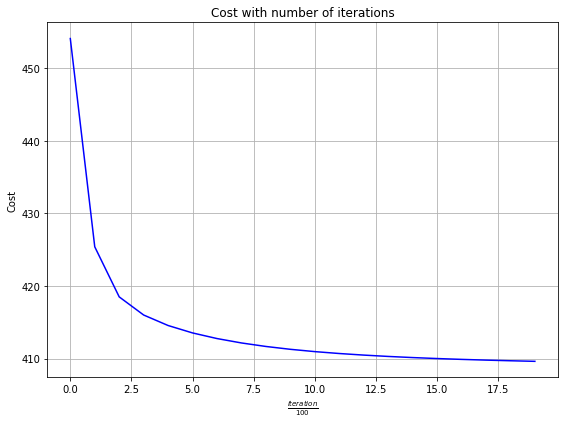

In [8]:
# using implemented function
W,H,cost= lstfind(V,r,numiter,toprint)
cost=cost[1:]
plotfigure((8,6),r"$\frac{iteration}{100}$", "Cost", 
           "Cost with number of iterations",x=cost,style="b-")

In [9]:
# using the inbuilt scikit implementation
model = NMF(n_components=5, init='random', random_state=0,solver="mu",beta_loss="frobenius")
W = model.fit_transform(V)
H = model.components_
# the Frobenius norm after 200 iterations
print(model.reconstruction_err_ )

410.5676547325077


/home/milind/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


cost after 10 iterations: 143207.32223891083
cost after 20 iterations: 121042.6337579739
cost after 30 iterations: 108838.58180271718
cost after 40 iterations: 104995.95913382061
cost after 50 iterations: 103499.36060250923
cost after 60 iterations: 102679.62383750395
cost after 70 iterations: 102142.72779945703
cost after 80 iterations: 101754.1239160978
cost after 90 iterations: 101454.38609486783
cost after 100 iterations: 101213.22687382589
cost after 110 iterations: 101011.31131289096
cost after 120 iterations: 100836.47843497025
cost after 130 iterations: 100681.68835749268
cost after 140 iterations: 100542.45455089747
cost after 150 iterations: 100414.63854128798
cost after 160 iterations: 100295.82411266712
cost after 170 iterations: 100181.7668191992
cost after 180 iterations: 100073.68579124939
cost after 190 iterations: 99973.82375090208
cost after 200 iterations: 99877.18336628587


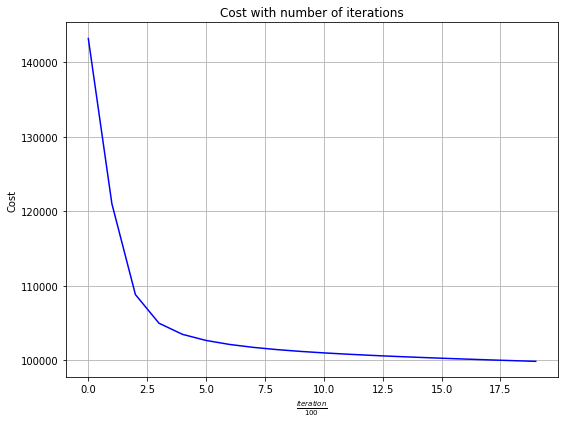

In [10]:
# NMF using the Kullback Liebler divergence
numiter=200
r=5
toprint=10
W,H,cost= divfind(V,r,numiter,toprint)
cost=cost[1:]
plotfigure((8,6),r"$\frac{iteration}{100}$", "Cost", 
           "Cost with number of iterations",x=cost,style="b-",)

In [11]:
# checking the maximum deviation 
print(np.max(abs(V-np.dot(W,H))))
# checking non-negativity
print(np.dot(W,H)[np.where(np.dot(W,H)<=0)])

2.433583505111132
[]


In [10]:
# NMF using Kullback Liebler using scikit learn
model = NMF(n_components=5, init='random', random_state=0,solver="mu",beta_loss=1)
W = model.fit_transform(V)
H = model.components_
# scikit implementation_
err= (model.reconstruction_err_ )
# modifying the obtained error to compre with 
# implementation
error= (err**2)/2
print(error)
print(np.max(abs(V-np.dot(W,H))))


100594.93660781306
2.182616061016743


/home/milind/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


# NMF on the CBCL dataset (quick and dirty test)

In [11]:
# CBCL dataset faces
path_faces = "/home/milind/source_separation/face/"

In [12]:
V = []
for images in listdir(path_faces):
# images = listdir(path_faces)[0]
    image = os.path.join(path_faces,images)
    img = cv2.imread(image,0)
    vi = np.array(img).flatten()
    V.append(vi)
#     plt.figure()
#     plt.imshow(img, cmap = "gray")
#     plt.show()


In [13]:
V = np.array(V)
V = V.T
print(np.shape(V))

(361, 2429)


In [14]:
# refer paper
r = 49 

In [15]:
# using the inbuilt scikit implementation
model = NMF(n_components=r, init='random', random_state=0,solver="mu",beta_loss=1,max_iter=50000)
W = model.fit_transform(V)
H = model.components_
# the Frobenius norm after 200 iterations
print(model.reconstruction_err_ )

1145.0331696742228


In [16]:
print(np.shape(W))

(361, 49)


## Comparing actual and reconstructed image

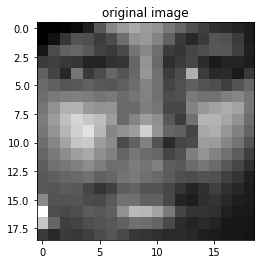

In [17]:
image1 = V[:,0].reshape(19,19)
plt.figure()
plt.imshow(image1,cmap="gray")
plt.title("original image")
plt.show()

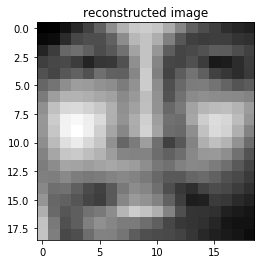

In [18]:
image1_reco = np.dot(W,H[:,0]).reshape(19,19)
plt.figure()
plt.imshow(image1_reco,cmap="gray")
plt.title("reconstructed image")
plt.show()

## Some of the features learnt 
* The reshaped columns of the W matrix
* Display the representational power of NMF

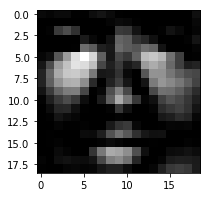

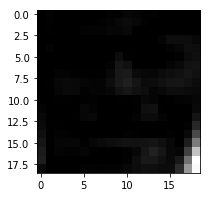

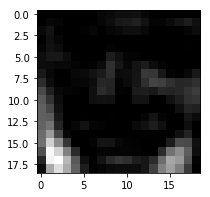

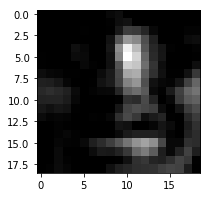

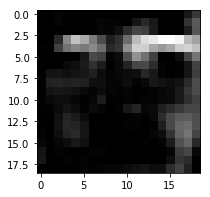

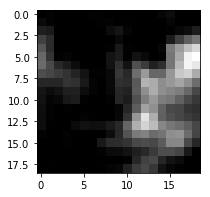

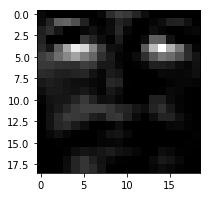

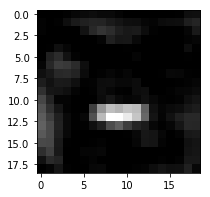

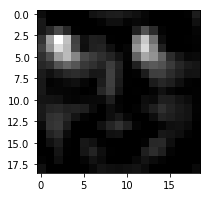

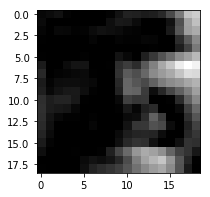

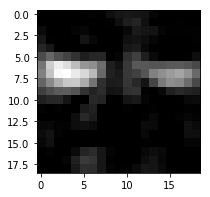

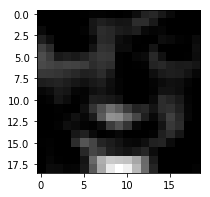

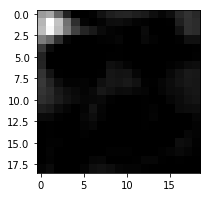

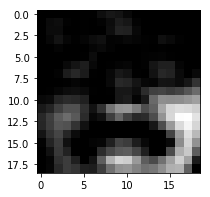

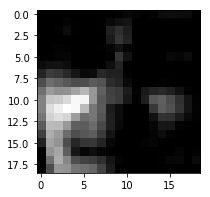

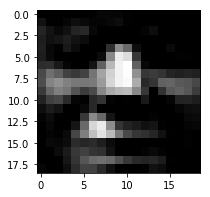

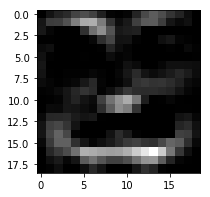

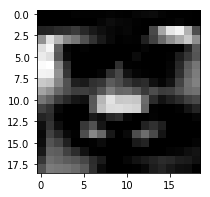

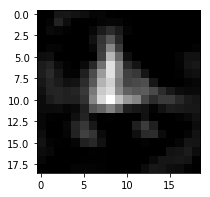

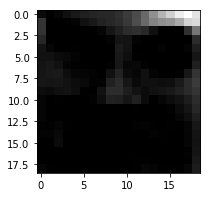

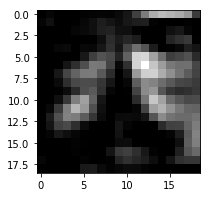

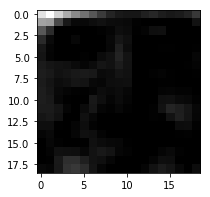

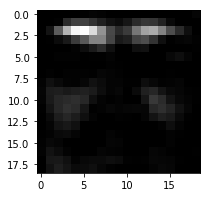

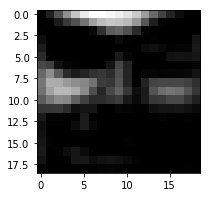

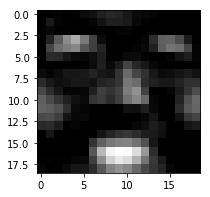

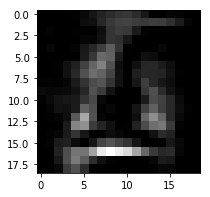

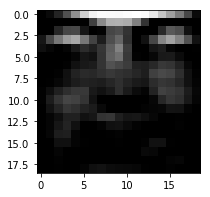

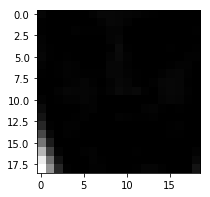

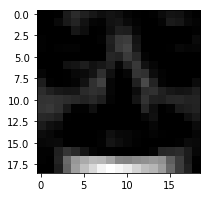

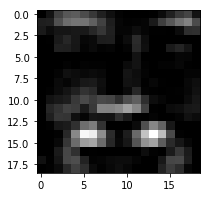

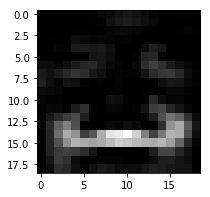

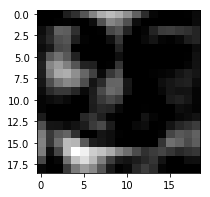

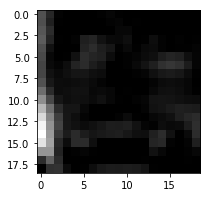

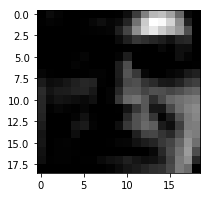

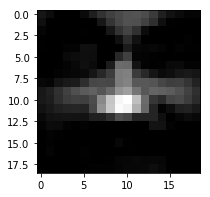

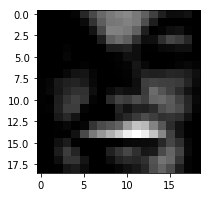

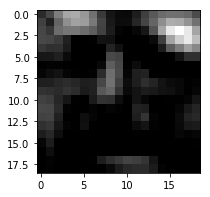

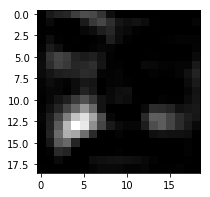

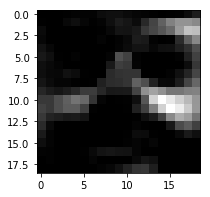

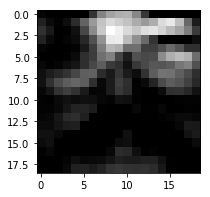

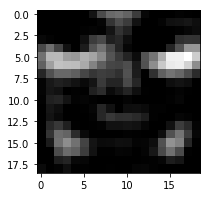

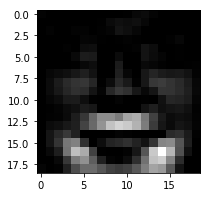

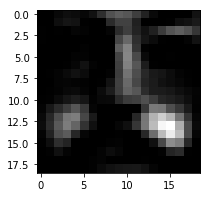

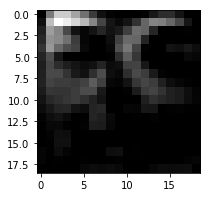

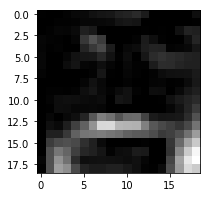

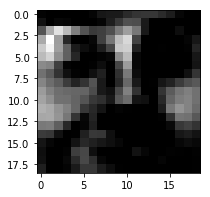

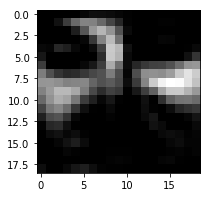

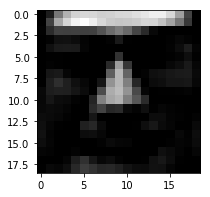

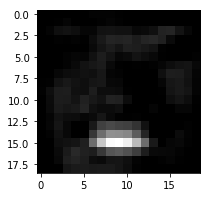

In [19]:
for i in range(0,np.shape(W)[1]):
    feature = W[:,i].reshape(19,19)
    plt.figure(figsize = (3,3))
    plt.imshow(feature,cmap="gray")
    plt.show()